In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import matplotlib.gridspec as gridspec

# Boxplots

In [39]:
csv_path=r'./data/validation_{0}2.csv'
products = ['AgERA5','ERA5','GEOS5']
metrics = ['bias','rmse','r2','pbias']
metric_labels = ['Bias','RMSE','r$^2$','PBias']
var_names = ['t_air','u','vp','ra','p_air']   
var_labels = ['Air temperature \n ($^\circ\mathrm{C}$)', 
              'Windspeed \n ($ms^{-1}$)',
            'Vapour pressure \n (mbar)',
              'Solar radiation \n ($Wm^{-2}$)',
              'Air pressure at surface \n (mbar)']

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1999569658.py:6: SyntaxWarning: invalid escape sequence '\c'
  var_labels = ['Air temperature \n ($^\circ\mathrm{C}$)',


<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1351533214.py:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if (var_name is 'p_air') & (product is 'AgERA5'):
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1351533214.py:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if (var_name is 'p_air') & (product is 'AgERA5'):


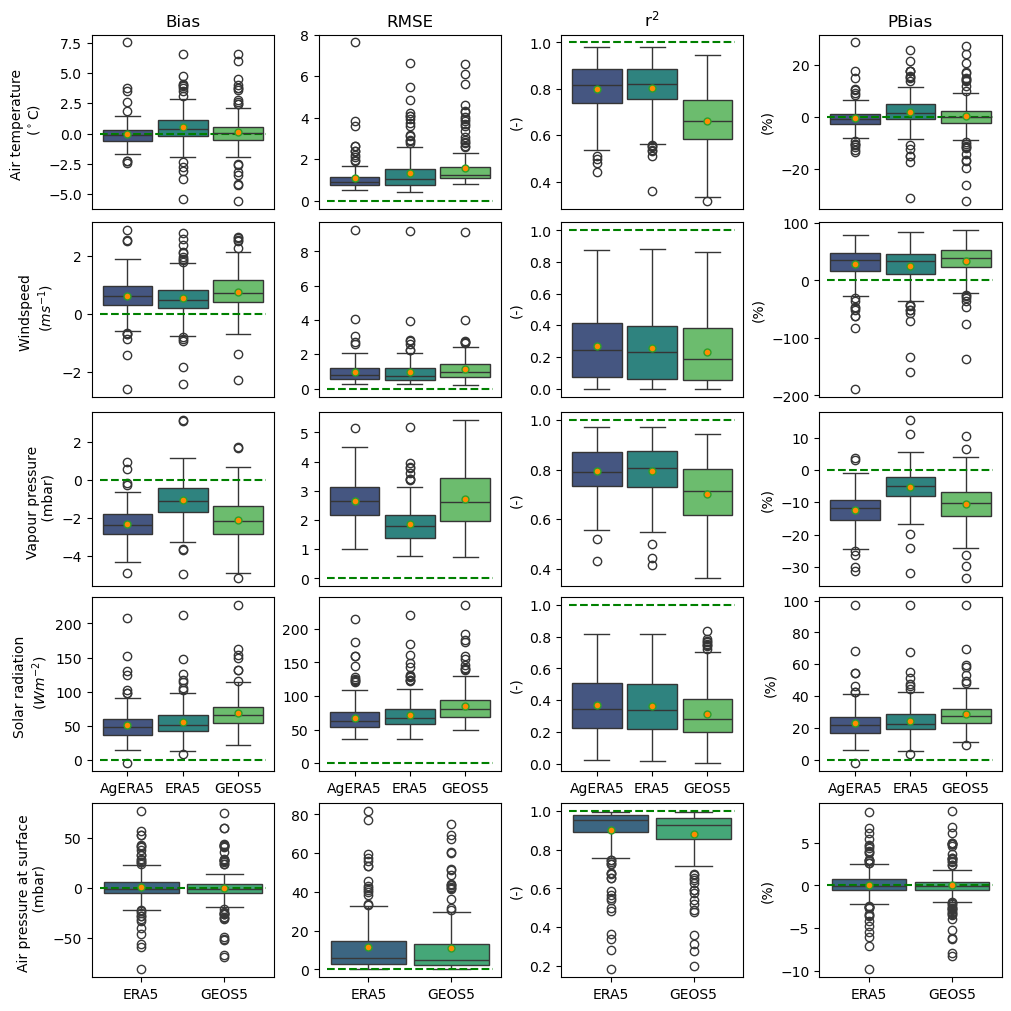

In [3]:
# create grid
fig, axs = plt.subplots(5, 4, figsize=(10, 10), layout="constrained")
for i,var_name in enumerate(var_names):
    for j,metric in enumerate(metrics):
        ax=axs[i,j]
        csv=csv_path.format(var_name)
        df= pd.read_csv(csv,sep=';') 
        #get plot data from csv
        data_dict={
        'product': [],
        'N': [],
        'station':[],
         'data': [],
        }
        for product in products:
            if (var_name is 'p_air') & (product is 'AgERA5'):
                continue
            else:
                data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
                data_dict['product']+=list(itertools.repeat(product, len(df)))
                data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
                data_dict['station']+=list(df['Station'].values)
        df_all=pd.DataFrame(data_dict)
        df_all=df_all.dropna()   
        # plot axis
        sns.boxplot(data=df_all,x='product', y='data', ax=ax,
                    hue="product",palette="viridis", 
                       width=0.9,
                    showmeans=True,meanprops=dict(marker='o', markerfacecolor='darkorange',
                                   markersize=5, zorder=3), 
                      )
        if i == 0:
            ax.set_title(metric_labels[j])
        if i < 3:
            ax.set_xticks([])            
        if j == 0:
            ax.set_ylabel(var_labels[i])
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        if j == 1:
            ax.set_ylabel('')
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        if j == 2:
            ax.set_ylabel('(-)')
            if i <4:
                ax.plot([-0.5,2.5],[1,1],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[1,1],'--',color='green')
        if j == 3:
            ax.set_ylabel('(%)')
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        ax.set_xlabel('')   
       
plt.savefig('./figures/all_boxplots_2018-2022.png',bbox_inches='tight')

## Extract result table

In [4]:
def extract_stats(df_all):
    df_summary=df_all.groupby('product')['data'].describe()
    df_summary['5%']=df_all.groupby('product')['data'].quantile(q=0.05)
    df_summary['95%']=df_all.groupby('product')['data'].quantile(q=0.95)
    return df_summary
def merge_with_multiindex(list_of_dfs,df_labels, label='source'):
    # Add a new level to the index indicating the source DataFrame
    for i,df in enumerate(list_of_dfs):
        df[label] = df_labels[i]        
        df.set_index(label, append=True, inplace=True)
    
    # Concatenate the two DataFrames
    merged_df = pd.concat(list_of_dfs).sort_index(level=0)
    return merged_df

In [5]:
list_of_dfs=[]
df_labels=[]
for i,var_name in enumerate(var_names):    
    for j,metric in enumerate(metrics):
        ax=axs[i,j]
        csv=csv_path.format(var_name)
        df= pd.read_csv(csv,sep=';') 
        #get plot data from csv
        data_dict={
        'product': [],
        'N': [],
        'station':[],
         'data': [],
        }
        for product in products:
            if (var_name == 'p_air') & (product == 'AgERA5'):
                continue
            else:
                data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
                data_dict['product']+=list(itertools.repeat(product, len(df)))
                data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
                data_dict['station']+=list(df['Station'].values)
        df_all=pd.DataFrame(data_dict)
        df_all=df_all.dropna() 
        df_summary=extract_stats(df_all)
        list_of_dfs.append(df_summary)
        df_labels.append(f'{var_name}_{metric}')
merged_df = merge_with_multiindex(list_of_dfs,df_labels, label='var_metric')
merged_df

count       mean        std           min        25%  \
product var_metric                                                          
AgERA5  ra_bias      174.0  51.640984  23.916406 -4.922994e+00  36.995105   
        ra_pbias     174.0  23.172208  10.592212 -2.335101e+00  16.718703   
        ra_r2        174.0   0.369262   0.194047  2.260024e-02   0.224475   
        ra_rmse      174.0  67.963181  25.672602  3.580013e+01  53.344625   
        t_air_bias   174.0  -0.077756   1.035009 -2.465709e+00  -0.600941   
        t_air_pbias  174.0  -0.451137   4.734886 -1.325235e+01  -2.689843   
        t_air_r2     174.0   0.798398   0.114749  4.424930e-01   0.740665   
        t_air_rmse   174.0   1.079130   0.695336  5.076146e-01   0.752837   
        u_bias       174.0   0.604018   0.637381 -2.590592e+00   0.297877   
        u_pbias      174.0  29.171381  31.653365 -1.882955e+02  17.113647   
        u_r2         174.0   0.271512   0.219809  5.610491e-04   0.074907   
        u_rmse       174.0   0.981122   0.818268  2.733603e-01   0.572938   
        vp_bias      139.0  -2.296111   0.927724 -4.879956e+00  -2.809731   
        vp_pbias     139.0 -12.267174   5.628177 -3.121383e+01 -15.370714   
        vp_r2        139.0   0.794305   0.105893  4.292729e-01   0.732129   
        vp_rmse      139.0   2.662728   0.796606  1.008251e+00   2.177498   
ERA5    p_air_bias   174.0   0.699234  18.705060 -8.171974e+01  -4.699103   
        p_air_pbias  174.0   0.063460   2.128019 -9.801940e+00  -0.520208   
        p_air_r2     174.0   0.900860   0.142466  1.809547e-01   0.889466   
        p_air_rmse   174.0  11.708171  14.593090  2.617636e-01   2.770942   
        ra_bias      174.0  55.151732  23.702107  8.145273e+00  42.937138   
        ra_pbias     174.0  24.395334  10.471828  3.638005e+00  19.091933   
        ra_r2        174.0   0.360903   0.190877  1.446851e-02   0.220026   
        ra_rmse      174.0  72.364586  25.337943  3.563612e+01  57.688266   
        t_air_bias   174.0   0.500236   1.389000 -5.427825e+00  -0.195544   
        t_air_pbias  174.0   2.032987   6.451711 -3.115439e+01  -0.897046   
        t_air_r2     174.0   0.803832   0.110822  3.574652e-01   0.755197   
        t_air_rmse   174.0   1.351817   0.949742  4.179664e-01   0.752692   
        u_bias       174.0   0.533565   0.712198 -2.432509e+00   0.183519   
        u_pbias      174.0  24.908925  33.775174 -1.585838e+02  11.401755   
        u_r2         174.0   0.258827   0.214805  3.153520e-07   0.063903   
        u_rmse       174.0   0.979094   0.851098  2.556841e-01   0.531690   
        vp_bias      139.0  -1.042676   1.155927 -4.952304e+00  -1.653240   
        vp_pbias     139.0  -5.345546   6.160602 -3.182386e+01  -8.130467   
        vp_r2        139.0   0.795462   0.112642  4.158513e-01   0.728186   
        vp_rmse      139.0   1.864028   0.726697  7.650889e-01   1.382433   
GEOS5   p_air_bias   174.0   0.295520  18.726932 -6.938603e+01  -5.432927   
        p_air_pbias  174.0   0.010568   2.127989 -8.284567e+00  -0.539824   
        p_air_r2     174.0   0.880764   0.140729  1.969017e-01   0.856943   
        p_air_rmse   174.0  11.176735  15.021818  3.097799e-01   2.197887   
        ra_bias      174.0  68.860312  25.185756  2.204735e+01  54.118031   
        ra_pbias     174.0  28.623228  10.024497  9.012944e+00  23.177068   
        ra_r2        174.0   0.310581   0.176563  2.607626e-03   0.197229   
        ra_rmse      174.0  85.708394  26.526483  4.923809e+01  69.350852   
        t_air_bias   174.0   0.108148   1.490816 -5.542555e+00  -0.520966   
        t_air_pbias  174.0   0.216503   7.066426 -3.202379e+01  -2.249669   
        t_air_r2     174.0   0.659159   0.128501  3.170634e-01   0.581534   
        t_air_rmse   174.0   1.572228   0.943362  7.840041e-01   1.098431   
        u_bias       174.0   0.748178   0.684449 -2.294899e+00   0.396694   
        u_pbias      174.0  33.579295  28.767646 -1.372953e+02  22.820866   
        u_r2     

In [6]:
merged_df.to_csv(r".\data\all_stations_metric_stats.csv",sep=';')

## Before correcting 10m windspeed

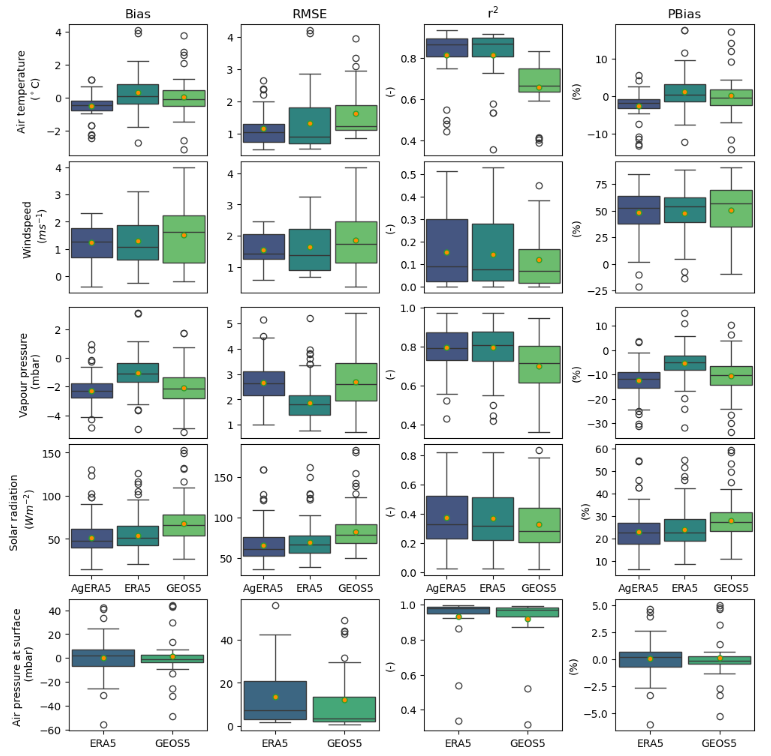

# Flag outliers

In [7]:
# Function to flag outliers using IQR method
def flag_outliers(df, columns=None):
    outlier_flags = pd.DataFrame(index=df.index)
    if columns is None:
        columns = df.select_dtypes(include='number').columns
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Create a flag for outliers
        outlier_flags[column + '_outlier'] = (df[column] < lower_bound) | (df[column] > upper_bound)

    return outlier_flags

In [8]:
csv_path=r'./data/validation_{0}2.csv'
products = ['AgERA5','ERA5','GEOS5']
products2 = ['ERA5','GEOS5']
metrics = ['bias','rmse','r2','pbias']
var_names = ['t_air','u','vp','ra','p_air']

for var_name in var_names:
    csv = f'./data/validation_{var_name}2.csv'
    separator_pattern = r'[,;]'
    df= pd.read_csv(csv,sep=separator_pattern,engine='python')

    # Get the outlier flags
    if var_name == 'p_air':
        selected_columns = [f'{var_name}_{product}_{metric}' for product in products2 for metric in metrics]
    else:
        selected_columns = [f'{var_name}_{product}_{metric}' for product in products for metric in metrics]
    outlier_flags = flag_outliers(df,columns=selected_columns)

    # Combine the original DataFrame with the outlier flags
    df_with_flags = pd.concat([df, outlier_flags], axis=1)
    # save datafamr with outlier flags
    save_csv=csv.replace('.csv','_outliers.csv')
    df_with_flags.to_csv(save_csv, sep=';', index=False)

# Map

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import rasterio
from rasterio.plot import show

In [11]:
metric= 'bias'
metric_label= 'Bias'#'$r^2$' 
units = ['($^\circ\mathrm{C}$)', 
              '($ms^{-1}$)',
            '(mbar)',
              '($Wm^{-2}$)',
              '(mbar)']

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1108954278.py:3: SyntaxWarning: invalid escape sequence '\c'
  units = ['($^\circ\mathrm{C}$)',


In [13]:
metric= 'rmse'
metric_label= 'RMSE'#'$r^2$' 
units = ['($^\circ\mathrm{C}$)', 
              '($ms^{-1}$)',
            '(mbar)',
              '($Wm^{-2}$)',
              '(mbar)']

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1550384961.py:3: SyntaxWarning: invalid escape sequence '\c'
  units = ['($^\circ\mathrm{C}$)',


In [15]:
metric= 'pbias'
metric_label= 'PBias'#'$r^2$' 
units = ['(%)', 
              '(%)',
            '(%)',
              '(%)',
              '(%)']

In [17]:
metric= 'r2'
metric_label= '$r^2$' 
units = ['(-)', 
              '(-)',
            '(-)',
              '(-)',
              '(-)']

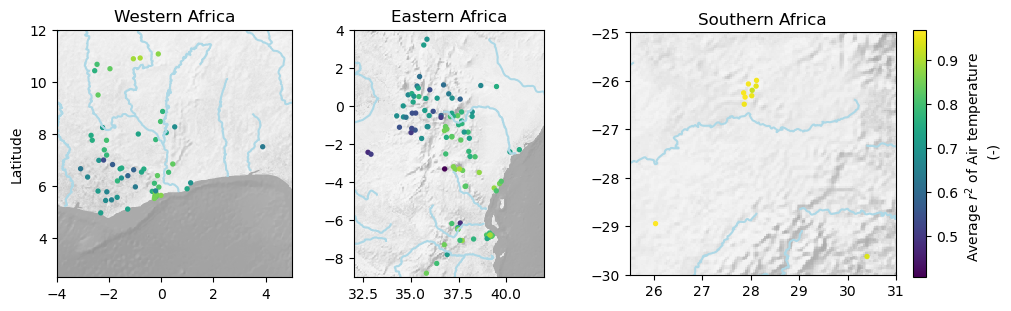

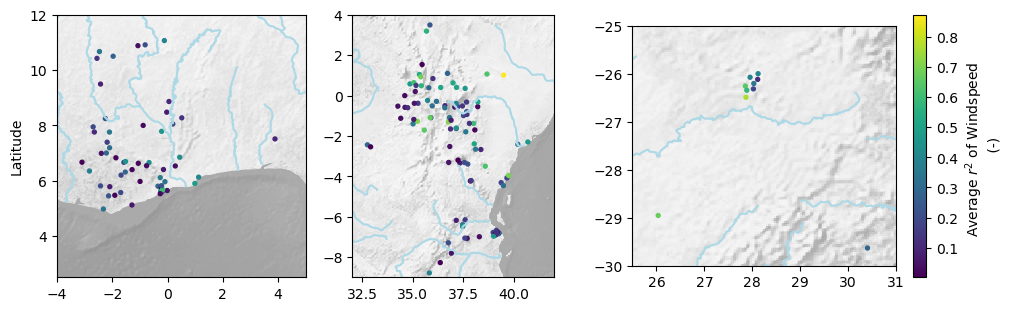

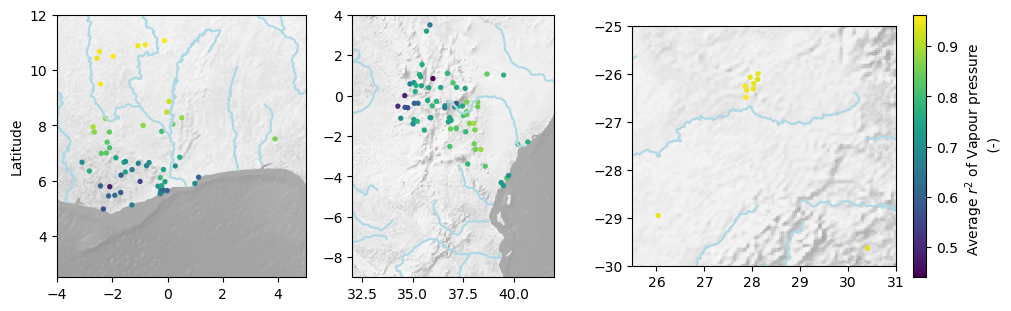

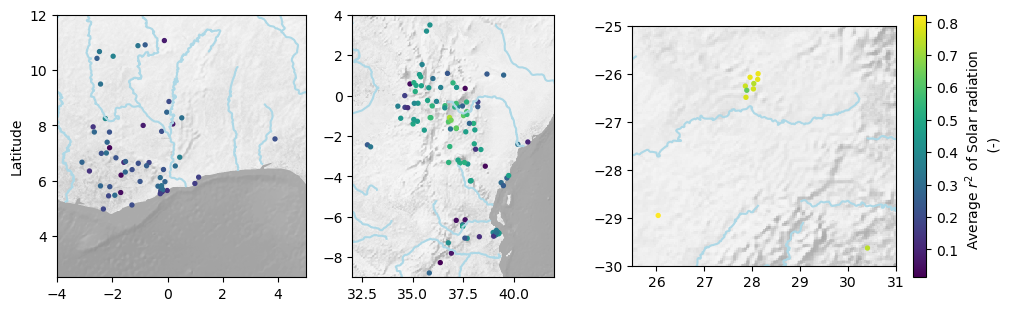

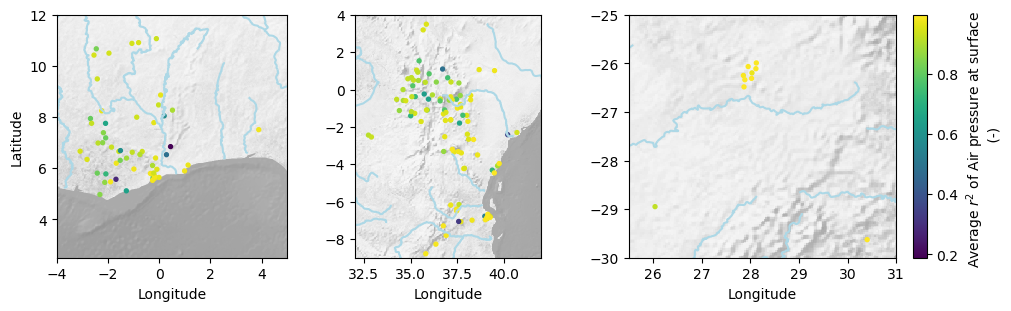

In [18]:

var_names = ['t_air','u','vp','ra','p_air']   
var_labels = ['Air temperature', 
              'Windspeed',
            'Vapour pressure',
              'Solar radiation',
              'Air pressure at surface']

# Define the bounding boxes
bounding_boxes = [
    [-4, 2.5, 5, 12],
    [32, -9, 42, 4],
    [25.5, -30, 31, -25]
]
zones = ['Western Africa','Eastern Africa', 'Southern Africa']


tif_path = r".\basemap\NE1_50M_SR_W\NE1_50M_SR_W.tif"
# Read the GeoTIFF
with rasterio.open(tif_path) as src:
    img = src.read(1)  # Read the first band
    img_meta = src.meta
    bounds = src.bounds
    transform = src.transform
rivers = gpd.read_file(r".\basemap\ne_10m_rivers_lake_centerlines.shp")

for v,var_name in enumerate(var_names):
    csv = f'./data/validation_{var_name}2.csv'
    df= pd.read_csv(csv,sep=';')
    if var_name != 'p_air':
        df['mean_metric']=(df[f'{var_name}_AgERA5_{metric}']+df[f'{var_name}_ERA5_{metric}']+df[f'{var_name}_GEOS5_{metric}'])/3
    else:
        df['mean_metric']=(df[f'{var_name}_ERA5_{metric}']+df[f'{var_name}_GEOS5_{metric}'])/2
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
    # Plotting
    fig= plt.figure(figsize=(10, 3), constrained_layout=True)
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], figure=fig)
    axs = [fig.add_subplot(gs[i]) for i in range(3) ]
    cbar_ax = fig.add_subplot(gs[3]) 
            
    # Plot each zoom-in
    for i,bbox in enumerate(bounding_boxes):
        # plot land and rivers
        # land = gpd.read_file(r"D:\Downloads\ne_110m_admin_0_countries.shp")
        # land.plot(ax=axs[i], color='lightgrey')
        
        rivers.plot(ax=axs[i], color='lightblue')
        show(img, transform=transform, ax=axs[i], cmap='gray', interpolation='none', alpha=0.5)
        # Plot the points with colors based on the 'value' column    
        if i == 2:
            gdf.plot(ax=axs[i], marker='o', markersize=8,column='mean_metric', cmap='viridis', 
                     legend=True, cax=cbar_ax)
        else:
            gdf.plot(ax=axs[i], marker='o', markersize=8,column='mean_metric', cmap='viridis', legend=False)
           
        
        # Set the axis limits to zoom in    
        axs[i].set_xlim(bbox[0], bbox[2])
        axs[i].set_ylim(bbox[1], bbox[3])
    
        # Set labels and title
        if v == 4:
            axs[i].set_xlabel('Longitude')
        if i == 0:
            axs[i].set_ylabel('Latitude')
        if v == 0:
            axs[i].set_title(f'{zones[i]}')
    
    cbar_ax.set_ylabel(f'Average {metric_label} of {var_labels[v]}  \n {units[v]}')    
    # cbar_ax.set_aspect(10)
    # plt.tight_layout()
    plt.savefig(f'./figures/map_{metric}_{var_name}.png',bbox_inches='tight')
    plt.show()


# boxplot for coastal stations

In [32]:
stations_csv = r".\data\Stations.csv"
df_stations = pd.read_csv(stations_csv, sep=';')
coastal=list(df_stations.loc[df_stations['10km_to_coast'] == 1]['Station'])
mountain=list(df_stations.loc[df_stations['elevation'] >= 1000]['Station'])

<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1204511990.py:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if (var_name is 'p_air') & (product is 'AgERA5'):
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1204511990.py:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if (var_name is 'p_air') & (product is 'AgERA5'):


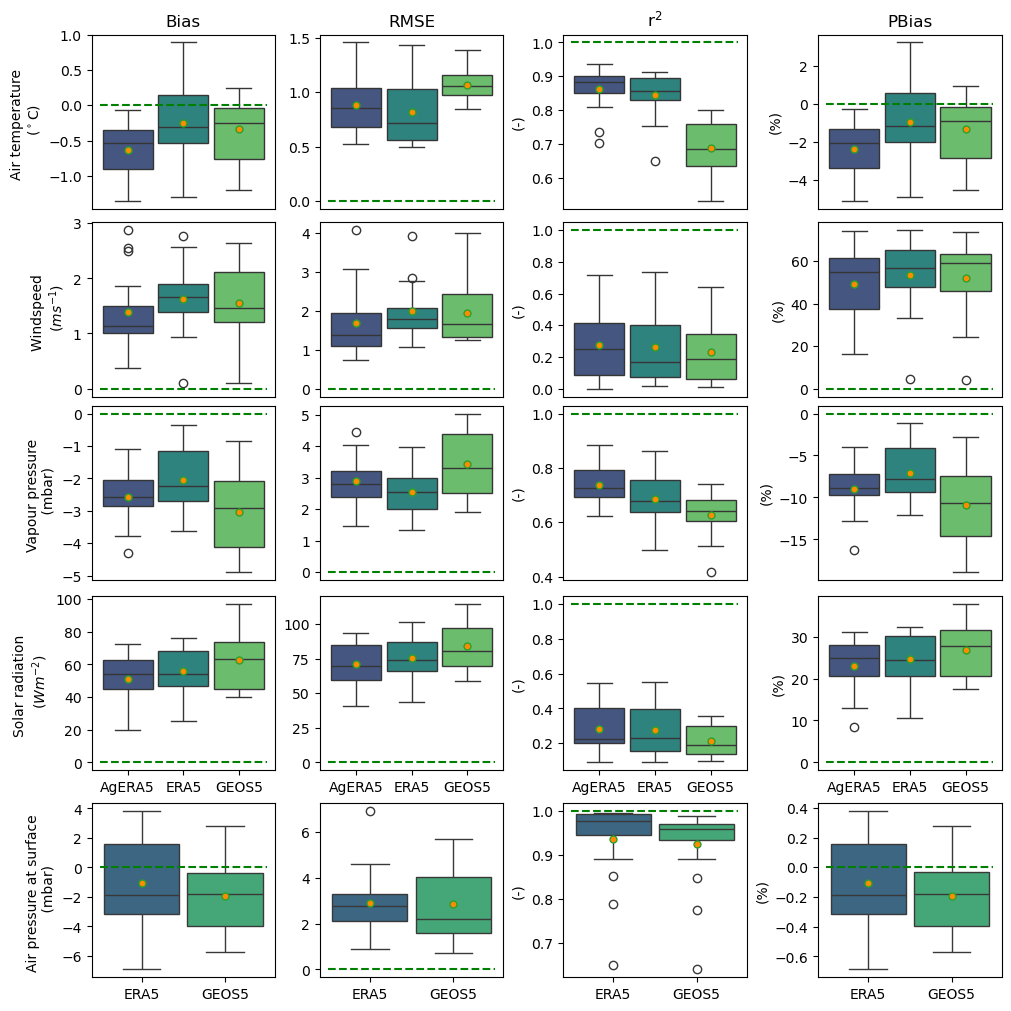

In [41]:
# create grid
fig, axs = plt.subplots(5, 4, figsize=(10, 10), layout="constrained")
for i,var_name in enumerate(var_names):
    for j,metric in enumerate(metrics):
        ax=axs[i,j]
        csv=csv_path.format(var_name)
        df= pd.read_csv(csv,sep=';') 
        #get plot data from csv
        data_dict={
        'product': [],
        'N': [],
        'station':[],
         'data': [],
        }
        for product in products:
            if (var_name is 'p_air') & (product is 'AgERA5'):
                continue
            else:
                data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
                data_dict['product']+=list(itertools.repeat(product, len(df)))
                data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
                data_dict['station']+=list(df['Station'].values)
        df_all=pd.DataFrame(data_dict)
        # filter coastal stations
        df_all=df_all[df_all['station'].isin(coastal)]
        df_all=df_all.dropna()   
        # plot axis
        sns.boxplot(data=df_all,x='product', y='data', ax=ax,
                    hue="product",palette="viridis", 
                       width=0.9,
                    showmeans=True,meanprops=dict(marker='o', markerfacecolor='darkorange',
                                   markersize=5, zorder=3), 
                      )
        if i == 0:
            ax.set_title(metric_labels[j])
        if i < 3:
            ax.set_xticks([])            
        if j == 0:
            ax.set_ylabel(var_labels[i])
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        if j == 1:
            ax.set_ylabel('')
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        if j == 2:
            ax.set_ylabel('(-)')
            if i <4:
                ax.plot([-0.5,2.5],[1,1],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[1,1],'--',color='green')
        if j == 3:
            ax.set_ylabel('(%)')
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        ax.set_xlabel('')   
       
plt.savefig('./figures/coastal_boxplots_2018-2022.png',bbox_inches='tight')

<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1881949087.py:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if (var_name is 'p_air') & (product is 'AgERA5'):
C:\Users\ntr002\AppData\Local\Temp\ipykernel_5604\1881949087.py:16: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if (var_name is 'p_air') & (product is 'AgERA5'):


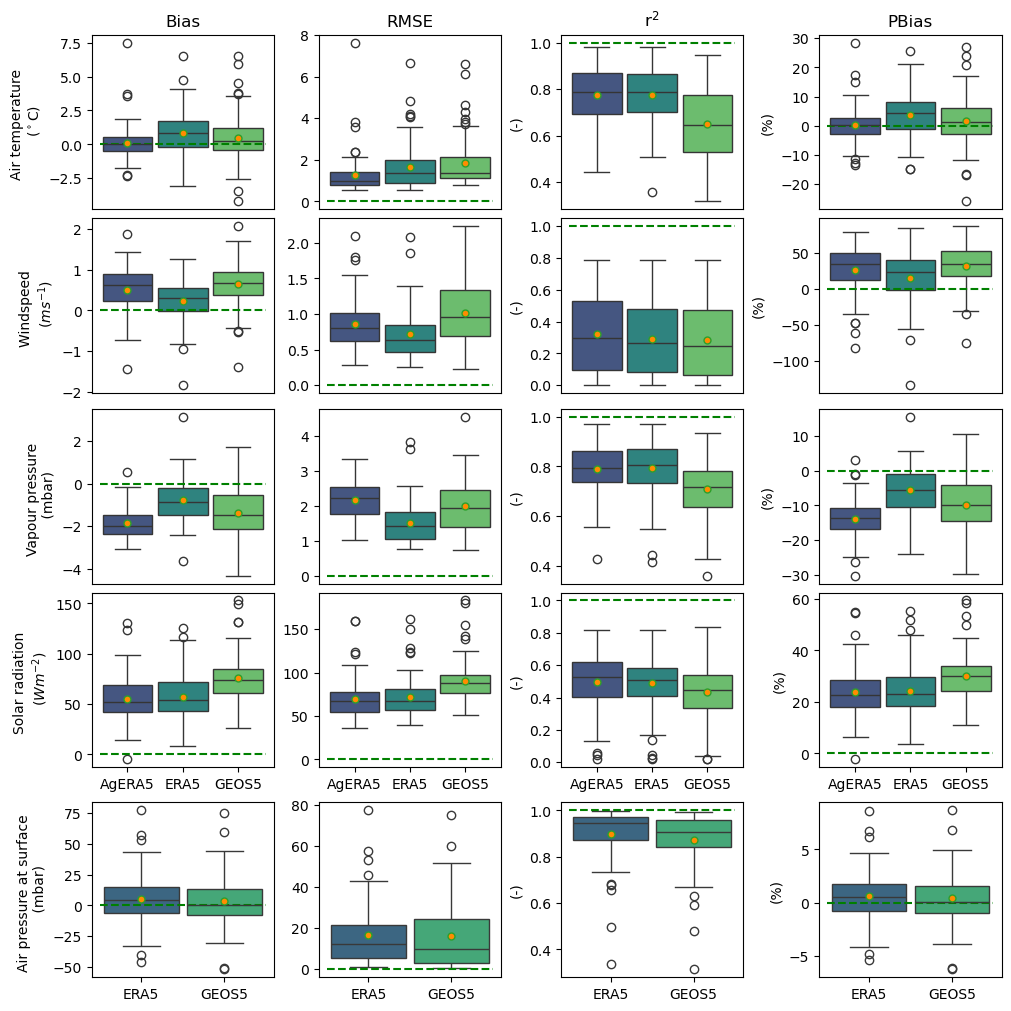

In [40]:
# create grid
fig, axs = plt.subplots(5, 4, figsize=(10, 10), layout="constrained")
for i,var_name in enumerate(var_names):
    for j,metric in enumerate(metrics):
        ax=axs[i,j]
        csv=csv_path.format(var_name)
        df= pd.read_csv(csv,sep=';') 
        #get plot data from csv
        data_dict={
        'product': [],
        'N': [],
        'station':[],
         'data': [],
        }
        for product in products:
            if (var_name is 'p_air') & (product is 'AgERA5'):
                continue
            else:
                data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
                data_dict['product']+=list(itertools.repeat(product, len(df)))
                data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
                data_dict['station']+=list(df['Station'].values)
        df_all=pd.DataFrame(data_dict)
        # filter coastal stations
        df_all=df_all[df_all['station'].isin(mountain)]
        df_all=df_all.dropna()   
        # plot axis
        sns.boxplot(data=df_all,x='product', y='data', ax=ax,
                    hue="product",palette="viridis", 
                       width=0.9,
                    showmeans=True,meanprops=dict(marker='o', markerfacecolor='darkorange',
                                   markersize=5, zorder=3), 
                      )
        if i == 0:
            ax.set_title(metric_labels[j])
        if i < 3:
            ax.set_xticks([])            
        if j == 0:
            ax.set_ylabel(var_labels[i])
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        if j == 1:
            ax.set_ylabel('')
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        if j == 2:
            ax.set_ylabel('(-)')
            if i <4:
                ax.plot([-0.5,2.5],[1,1],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[1,1],'--',color='green')
        if j == 3:
            ax.set_ylabel('(%)')
            if i <4:
                ax.plot([-0.5,2.5],[0,0],'--',color='green')
            else:
                ax.plot([-0.5,1.5],[0,0],'--',color='green')
        ax.set_xlabel('')   
       
plt.savefig('./figures/mountain_boxplots_2018-2022.png',bbox_inches='tight')